In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [2]:
data_path = '../data/'
lines = open(data_path+'강수일수.csv', 'r').readlines()[9:39]
print(lines[0])
print(lines[-1])

1990,7.3,12.3,8.7,7.7,10.1,12.0,10.3,7.6,12.1,4.7,4.0,3.1,100.0,11

2019,3.4,4.0,8.0,9.7,6.1,10.1,12.4,10.9,14.7,7.0,4.9,4.9,96.1,17



In [3]:
data = []
years = []
for line in lines:
    year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, _, _ = line.strip().split(',')
    data.append([np.float(Jan), np.float(Feb), np.float(Mar), np.float(Apr), np.float(May), np.float(Jun),
                 np.float(Jul), np.float(Aug), np.float(Sep), np.float(Oct), np.float(Nov), np.float(Dec)])
    years.append(np.int(year))

In [4]:
df = pd.DataFrame(data)
df.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df.index = years
print(df)

      Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  Dec
1990  7.3  12.3   8.7   7.7  10.1  12.0  10.3   7.6  12.1   4.7   4.0  3.1
1991  5.6   8.7  10.6   6.3   8.3  10.3  18.7  11.3   8.4   1.3   4.7  8.4
1992  4.4   5.3  11.0  11.4   9.1   5.4   7.6  12.6  10.6   5.3   3.7  7.4
1993  6.1   3.1   6.1   3.6  10.3  10.9  15.6  19.7   5.3   3.4   9.4  3.4
1994  4.3   4.3   6.3   8.4   8.1   7.6   2.9   7.9   3.4   6.0   3.3  2.6
1995  5.0   2.4   7.1   7.3   9.7   7.3  12.7  12.1   6.0   4.6   3.1  0.6
1996  3.3   2.3   9.4   4.3   7.6  12.7  10.4   9.1   3.7   5.0   9.3  3.9
1997  2.4   2.3   5.9  10.0  12.0  10.7  12.1  12.9   4.4   2.0   8.3  5.0
1998  6.9   8.3   4.6  12.0   9.0  15.7  15.7  16.6   7.9   5.9   3.7  1.4
1999  2.4   4.3   8.4   8.3   8.6  10.3  16.0  18.1  12.1   6.9   4.6  0.7
2000  7.9   0.3   5.3   7.3   8.1  11.0  10.1  12.0  10.7   6.0   6.3  2.6
2001  7.0   6.3   5.0   4.7   7.1  11.3  11.1   9.4   7.1   7.7   2.3  5.0
2002  6.4   3.1   6.1   7

In [5]:
train_dataset = df[df.index < 2019].dropna().values
test_dataset = df[df.index == 2019].dropna().values

In [6]:
def div_xy(data, seek_step, features):
    x, y = [], []
    for i in range(len(data)-seek_step-1):
        x.append(data[i:i+seek_step])
        y.append(data[i+seek_step])
    return np.array(x).reshape(-1, seek_step, features), np.array(y).reshape(-1, features)

In [7]:
seek_step = 5
features = 12

x_train, y_train = div_xy(train_dataset, seek_step, features)
for i in range(5):
    print(x_train[i])
    print(y_train[i])
    print()

[[ 7.3 12.3  8.7  7.7 10.1 12.  10.3  7.6 12.1  4.7  4.   3.1]
 [ 5.6  8.7 10.6  6.3  8.3 10.3 18.7 11.3  8.4  1.3  4.7  8.4]
 [ 4.4  5.3 11.  11.4  9.1  5.4  7.6 12.6 10.6  5.3  3.7  7.4]
 [ 6.1  3.1  6.1  3.6 10.3 10.9 15.6 19.7  5.3  3.4  9.4  3.4]
 [ 4.3  4.3  6.3  8.4  8.1  7.6  2.9  7.9  3.4  6.   3.3  2.6]]
[ 5.   2.4  7.1  7.3  9.7  7.3 12.7 12.1  6.   4.6  3.1  0.6]

[[ 5.6  8.7 10.6  6.3  8.3 10.3 18.7 11.3  8.4  1.3  4.7  8.4]
 [ 4.4  5.3 11.  11.4  9.1  5.4  7.6 12.6 10.6  5.3  3.7  7.4]
 [ 6.1  3.1  6.1  3.6 10.3 10.9 15.6 19.7  5.3  3.4  9.4  3.4]
 [ 4.3  4.3  6.3  8.4  8.1  7.6  2.9  7.9  3.4  6.   3.3  2.6]
 [ 5.   2.4  7.1  7.3  9.7  7.3 12.7 12.1  6.   4.6  3.1  0.6]]
[ 3.3  2.3  9.4  4.3  7.6 12.7 10.4  9.1  3.7  5.   9.3  3.9]

[[ 4.4  5.3 11.  11.4  9.1  5.4  7.6 12.6 10.6  5.3  3.7  7.4]
 [ 6.1  3.1  6.1  3.6 10.3 10.9 15.6 19.7  5.3  3.4  9.4  3.4]
 [ 4.3  4.3  6.3  8.4  8.1  7.6  2.9  7.9  3.4  6.   3.3  2.6]
 [ 5.   2.4  7.1  7.3  9.7  7.3 12.7 12.1  6.   4.6  

In [8]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [9]:
history = LossHistory()
history.init()

model = Sequential()
model.add(SimpleRNN(units=256))
model.add(Dense(features))
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=100, batch_size=128, callbacks=[history])

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3763 - accuracy: 0.6522
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 1.2296 - accuracy: 0.7391
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 1.1139 - accuracy: 0.7391
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 1.0378 - accuracy: 0.6957
Epoch 5/100
1/1 [==============================] - 0s 999us/step - loss: 0.9957 - accuracy: 0.7391
Epoch 6/100
1/1 [==============================] - 0s 999us/step - loss: 0.9807 - accuracy: 0.6957
Epoch 7/100
1/1 [==============================] - 0s 993us/step - loss: 0.9860 - accuracy: 0.7826
Epoch 8/100
1/1 [==============================] - 0s 998us/step - loss: 1.0012 - accuracy: 0.6957
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.9789 - accuracy: 0.7826
Epoch 10/100
1/1 [==============================] - 0s 999us/step - loss: 0.9552 - accuracy: 0.6957
Epoch 11/100
1/1 [===

1/1 [==============================] - 0s 999us/step - loss: 0.0661 - accuracy: 0.9565
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.8261
Epoch 85/100
1/1 [==============================] - 0s 999us/step - loss: 0.0714 - accuracy: 0.9565
Epoch 86/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.7826
Epoch 87/100
1/1 [==============================] - 0s 999us/step - loss: 0.0737 - accuracy: 0.9565
Epoch 88/100
1/1 [==============================] - 0s 998us/step - loss: 0.0671 - accuracy: 0.9130
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9565
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9565
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.8696
Epoch 92/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 1.0000
Epoch 93/100
1/1 [=======

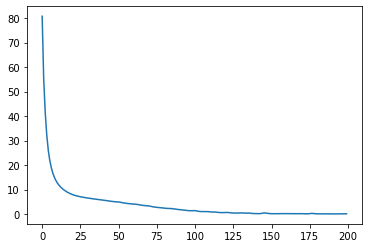

In [20]:
loss = history.losses
epochs = range(len(loss))
plt.plot(epochs, loss)
plt.show()

In [21]:
y_hat = []
for trained_x in x_train:
    trained_x = trained_x.reshape(1, seek_step, features)
    y_hat.append(model.predict(trained_x))
length = range(len(y_hat))
y_hat = np.squeeze(y_hat)

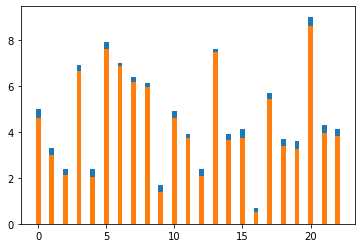

In [22]:
fig, ax = plt.subplots()
real = ax.bar(x=np.arange(len(y_train[:, 0])), height=y_train[:, 0], width=0.35)
pred = ax.bar(x=np.arange(len(y_hat[:, 0])), height=y_hat[:, 0], width=0.35)
plt.show()

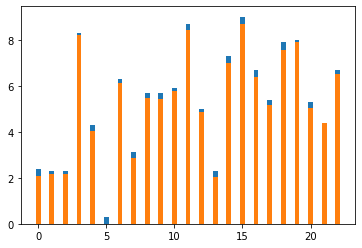

In [23]:
fig, ax = plt.subplots()
real = ax.bar(x=np.arange(len(y_train[:, 1])), height=y_train[:, 1], width=0.35)
pred = ax.bar(x=np.arange(len(y_hat[:, 1])), height=y_hat[:, 1], width=0.35)
plt.show()

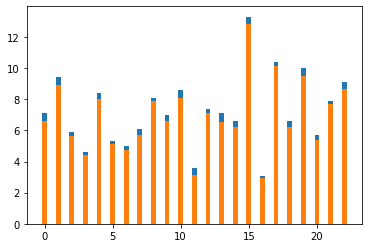

In [24]:
fig, ax = plt.subplots()
real = ax.bar(x=np.arange(len(y_train[:, 2])), height=y_train[:, 2], width=0.35)
pred = ax.bar(x=np.arange(len(y_hat[:, 2])), height=y_hat[:, 2], width=0.35)
plt.show()

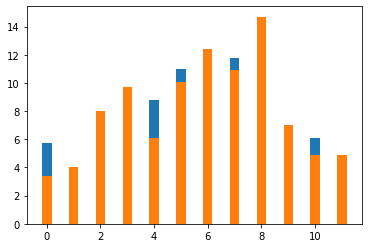

In [25]:
x_test = model.predict(train_dataset[-5:].reshape(1, seek_step, features))
x_test = np.squeeze(x_test)
y_test = np.squeeze(test_dataset)

fig, ax = plt.subplots()
real = ax.bar(x=np.arange(len(x_test)), height=x_test, width=0.35)
pred = ax.bar(x=np.arange(len(y_test)), height=y_test, width=0.35)
plt.show()